In [106]:
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import math
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, KBinsDiscretizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from time import sleep

pd.set_option('display.float_format', lambda x: '%.3f' % x)

sns.set()

In [107]:
def generaPath(tipo, nombre):
    prepath = str(os.getcwd())
    if (tipo == "I"):
        path = prepath + '\\origen\\' + nombre
    else :
        path = prepath + '\\generados\\' + nombre
    return path

In [108]:
df_tr_fu_filt_delta = pd.read_csv(generaPath('O', 'df_tr_fu_filt_delta.csv'))
df_re_fu_filt_delta = pd.read_csv(generaPath('O', 'df_re_fu_filt_delta.csv'))

In [109]:
conteos_1d_sb_tr = pd.read_csv(generaPath('O', 'conteos_1d_sb_tr.csv'))
conteos_1d_sb_re = pd.read_csv(generaPath('O', 'conteos_1d_sb_re.csv'))

In [110]:
conteos_1d_tr = pd.read_csv(generaPath('O', 'conteos_1d_tr.csv'))
conteos_1d_re = pd.read_csv(generaPath('O', 'conteos_1d_re.csv'))

In [111]:
conteos_2d_tr = pd.read_csv(generaPath('O', 'conteos_2d_tr.csv'))
conteos_2d_re = pd.read_csv(generaPath('O', 'conteos_2d_re.csv'))

In [112]:
conteos_3d_tr = pd.read_csv(generaPath('O', 'conteos_3d_tr.csv'))
conteos_3d_re = pd.read_csv(generaPath('O', 'conteos_3d_re.csv'))

In [113]:
conteos_4d_tr = pd.read_csv(generaPath('O', 'conteos_4d_tr.csv'))
conteos_4d_re = pd.read_csv(generaPath('O', 'conteos_4d_re.csv'))

In [114]:
conteos_5d_tr = pd.read_csv(generaPath('O', 'conteos_5d_tr.csv'))
conteos_5d_re = pd.read_csv(generaPath('O', 'conteos_5d_re.csv'))

#### Establezco los valores de inicio de los sorteos para calcular deltas

In [115]:
df_topes = df_tr_fu_filt_delta.iloc[0::1,[0]]
recent = df_topes.max()
print("sorteo mas reciente ", recent)
oldest = df_topes.min()
print("sorteo inicial ", oldest)

sorteo mas reciente  idSorteo    2121
dtype: int64
sorteo inicial  idSorteo    1671
dtype: int64


#### Se calcula los valores de diferencia entre los diversos sorteos

In [116]:
def calcular_deltas_verticales(df):
    delticas = []
    previo = recent
    for index, row in df.iterrows():
        resta = int(previo) - int(row[0])
        #print("resta : ", resta, " previo ", previo, " Sorteo: ", row[0], )
        delticas.append(int(resta))
        previo = int(row[0])
    resta = int(previo) - int(oldest)
    #print(resta)
    delticas.append(int(resta))
    return delticas

In [117]:
def unsplited_tupla(sbs):
    delticas = []
    partido = sbs.split(sep='|') if (sbs.find("|") >= 1) else sbs
    return partido

In [118]:
def calc_media(df):
    acum = 0
    media = 0
    length = len(df) 
    for i in range(length): 
        acum += int(df[i])
    media = int(acum/length)
    #print("valor de media: ", media)
    return media

In [119]:
def calc_moda(df):
    repetir = 0                                                                         
    for i in df:                                                                              
        aparece = df.count(i)                                                             
        if aparece > repetir:                                                       
            repetir = aparece 
    
    moda = []                                                                               
    for i in df:                                                                              
        aparece = df.count(i)
        #print("aparece ", aparece)
        if aparece == repetir and i not in moda:                                   
            moda.append(i) 
            #print("moda", moda)
            
    return moda

In [120]:
def calc_cant_moda(df_deltas, df_elected):
    #print(df_elected)
    num = str(df_elected[0])
    partido = num.split(sep='|') if (num.find("|") >= 1) else num
    
    #print(partido)
    repetir = 0                                                                         
    for i in df_deltas:
        #print("valor de i :", i)
        aparece = df_deltas.count(df_elected[0])   
        #print("valor de aparece:", aparece)
        if aparece > repetir:                                                       
            repetir = aparece 
    
    moda = []                                                                               
    for i in df_deltas:                                                                              
        aparece = df_deltas.count(i)
        #print("aparece ", aparece)
        if aparece == repetir and i not in moda:                                   
            moda.append(i) 
            #print("moda", moda)
    #print("fin ciclo", moda)        
    return moda

In [121]:
def sumarcol_peso(ldf):
    #print("valor de ldf", ldf)
    df = pd.DataFrame(ldf)
    #print("columna conteo ", df['conteo'])
    suma = ldf.sum()
    #suma = sumalista(df)
    print("valor de suma ", suma  )
    pesos = []                                                                               
    for index, row in df.iterrows():
        cant_tupla = int(row[0])
        #print("can_tupla ", cant_tupla)
        if cant_tupla > 0:
            dividido = cant_tupla /suma 
        pesos.append(float(dividido))  
    #print(type(pesos))
    return pesos

In [122]:
def sumalista(df):
    acum = 0
    #print("valor de listaNumeros ", df)
    for index, row in df.iterrows():
        cant_tupla = int(row[0])
        #print("can_tupla ", cant_tupla)
        acum = acum + cant_tupla
        print(acum)
    return acum

In [123]:
def entire_part(res1):
    pd, pe = math.modf(res1)
    #print("entire Part: ", pe, " decimal part: ", pd)
    if (int(pe) >= int(1)):
        res = pd
    else: 
        res = 1 - pd
    #print("res en entire_part", res)
    return res

In [124]:
def set_hot_level(last_number, evaluated_number ):
    #print("last:",int(last_number), " evaluated ",int(evaluated_number))
    if (int(last_number) > int(0) & int(evaluated_number) > int(0)):
        num = float(int(last_number) /int(evaluated_number))
    else:
        num = int(0)
    #print("num:", num)
    ret = entire_part(num)
    return ret

In [125]:
def set_closer_to_1(actual_number, new_number ):
    if actual_number >1:
        dif1 = float(actual_number - 1)
    else:
        dif1 = float(1 - actual_number)
    if new_number > 1:
        dif2 = float(new_number - 1)
    else:
        dif2 = float(1- new_number) 
    
    if dif1 > dif2:
        dif = new_number
    else:
        dif = actual_number
    return dif

In [126]:
def retorna_valor(valor):
    p2t = 0
    if float(valor) == float(0.0):
        p2t = float(0.3333)
    else:    
        p2t = valor
    return p2t

In [127]:
def how_hot_is(df, df_base):
    anterior = 0
    prob = []
    prob1 = []
    prob2 = []
    prob3 = []
    better = []
    for index, row in df.iterrows():
        last = int(row[3])
        media = int(row[2])
        moda = str(row[4]) 
        pesos = float(row[7])
        #print("last: ",last," media: ", media, " pesos: ", pesos, " moda: ", moda)
        if ((int(last) > int(0)) & (int(media) > int(0)) ):
            res1 = set_hot_level(last, media)
            p1 = float(res1)
        else:
            p1 = float(0.33)
        prob1.append(p1)
        
        splitedtupla= unsplited_tupla(moda)
        if type(splitedtupla) is not type(moda):
            df_splited = pd.DataFrame(splitedtupla)
            #print("df_splited:", df_splited)
            for index, row in df_splited.iterrows():
                valor = int(row[0])
                res2 = set_hot_level(last, valor)
                better.append(float(res2)) 
            #print("valor de better ", better)
            conteo = len(better)          
            for i in better: 
                temp = float(i) 
                if int(conteo) == int(0):
                    conteo = conteo +1
                    anterior = i
                else:
                    conteo = conteo +1
                    if float(temp) <= float(anterior):
                        anterior = temp
            p2 = retorna_valor(anterior)
        else:
            res2 = set_hot_level(last, moda)
            p2 = retorna_valor(res2)
        prob2.append(p2)        
        
        p3 = pesos
        prob3.append(p3)
        #print("p1: ",p1, "p2: ", p2, "p3: ", p3)
        prob.append(float(p1 + p2 + p3)/ int(3))
    return prob, prob1, prob2, prob3

In [128]:
def procesa_conteo_sbs(conteos, df):
    media = []
    modaa = []
    lasts = []
    delta = []
    resta = []
    for index, row in conteos.iterrows():
        sbs = str(row[1])
        sbs1 = [str(sbs)]
        dftx = df[df.sb.isin(sbs1)]
        df_filt = dftx.iloc[0::1,[0]]
        df_tupla = calcular_deltas_verticales(df_filt)
        lasts.append(df_tupla[0])
        media.append(calc_media(df_tupla))
        resta.append(abs(int(df_tupla[0])- int(calc_media(df_tupla))))
        df_moda = calc_moda(df_tupla)
        pal = '|'.join([str(m) for m in df_moda]) if len(df_moda) > 1  else str(df_moda[0])
        modaa.append(pal)
        #conteos = calc_cant_moda(df_tupla, df_moda)
        palabra = '|'.join([str(e) for e in df_tupla]) 
        delta.append(palabra)        
        #print(sbs, " X", promedio, " L", last, " M", moda," T",  df_tupla)
    dft = conteos
    dft['X'] = media
    dft['L'] = lasts
    dft['R'] = resta    
    dft['M'] = modaa
    dft['T'] = delta
    df_filt2 = dft.iloc[0::1,[0]]
    #print("df_filt2", df_filt2)
    df_pesos = sumarcol_peso(df_filt2)
    #print("valor de df_pesos ", df_pesos)
    
    dft['P'] = df_pesos
    #dft['Pr'], dft['Pr1'],dft['Pr2'],dft['Pr3'] = how_hot_is(dft, df_tr_fu_filt_delta)
    proba, proba1,proba2,proba3 = how_hot_is(dft, df_tr_fu_filt_delta)
    dft['Pr']= proba
    dft['PrX'] = proba1
    dft['PrL'] = proba2
    dft['PrM'] = proba3
    #dft.insert(2, "P", df_pesos, True) 
    return dft

In [129]:
def procesa_conteo_singles(conteos, df):
    media = []
    modaa = []
    lasts = []
    delta = []
    resta = []
    for index, row in conteos.iterrows():
        sbs = str(row[1])
        sbs1 = [str(sbs)]
        dftx = df[df.n1.isin(sbs1) | df.n2.isin(sbs1) |df.n3.isin(sbs1) | df.n4.isin(sbs1) |df.n5.isin(sbs1)]
        df_filt = dftx.iloc[0::1,[0]]
        df_tupla = calcular_deltas_verticales(df_filt)
        lasts.append(df_tupla[0])
        media.append(calc_media(df_tupla))
        resta.append(abs(int(df_tupla[0])- int(calc_media(df_tupla))))
        df_moda = calc_moda(df_tupla)
        pal = '|'.join([str(m) for m in df_moda]) if len(df_moda) > 1  else str(df_moda[0])
        modaa.append(pal)
        #conteos = calc_cant_moda(df_tupla, df_moda)
        palabra = '|'.join([str(e) for e in df_tupla]) 
        delta.append(palabra)        
        #print(sbs, " X", promedio, " L", last, " M", moda," T",  df_tupla)
    dft = conteos
    dft['X'] = media
    dft['L'] = lasts
    dft['R'] = resta  
    dft['M'] = modaa
    dft['T'] = delta
    df_filt2 = dft.iloc[0::1,[0]]
    #print("df_filt2", df_filt2)
    df_pesos = sumarcol_peso(df_filt2)
    #print("valor de df_pesos ", df_pesos)
    
    dft['P'] = df_pesos
    #dft['Pr'], dft['Pr1'],dft['Pr2'],dft['Pr3']  = how_hot_is(dft, df_tr_fu_filt_delta)
    proba, proba1,proba2,proba3 = how_hot_is(dft, df_tr_fu_filt_delta)
    dft['Pr']= proba
    dft['PrX'] = proba1
    dft['PrL'] = proba2
    dft['PrM'] = proba3
    #dft.insert(2, "P", df_pesos, True) 
    return dft

In [130]:
def procesa_conteo_dobles(conteos, df):
    media = []
    modaa = []
    lasts = []
    delta = []
    resta = []
    for index, row in conteos.iterrows():
        sbs = str(row[1])
        splitedtupla= unsplited_tupla(sbs)
        sbs1 = [str(splitedtupla[0])]
        sbs2 = [str(splitedtupla[1])]
        dftx = df[(df.n1.isin(sbs1) | df.n2.isin(sbs1) |df.n3.isin(sbs1) | df.n4.isin(sbs1) |df.n5.isin(sbs1)) 
                & (df.n1.isin(sbs2) | df.n2.isin(sbs2) |df.n3.isin(sbs2) | df.n4.isin(sbs2) |df.n5.isin(sbs2))]
        df_filt = dftx.iloc[0::1,[0]]
        df_tupla = calcular_deltas_verticales(df_filt)
        lasts.append(df_tupla[0])
        media.append(calc_media(df_tupla))
        resta.append(abs(int(df_tupla[0])- int(calc_media(df_tupla))))
        df_moda = calc_moda(df_tupla)
        pal = '|'.join([str(m) for m in df_moda]) if len(df_moda) > 1  else str(df_moda[0])
        modaa.append(pal)
        palabra = '|'.join([str(e) for e in df_tupla]) 
        delta.append(palabra)
    dft = conteos
    #print("IMPRIMO DFT ", dft)
    dft['X'] = media
    dft['L'] = lasts
    dft['R'] = resta    
    dft['M'] = modaa
    df_filt2 = dft.iloc[0::1,[0]]
    #print("df_filt2", df_filt2)
    df_pesos = sumarcol_peso(df_filt2)
    #print("valor de df_pesos ", df_pesos)
    dft['T'] = delta
    dft['P'] = df_pesos
    #dft['Pr'], dft['Pr1'],dft['Pr2'],dft['Pr3']  =how_hot_is(dft, df_tr_fu_filt_delta)
    proba, proba1,proba2,proba3 = how_hot_is(dft, df_tr_fu_filt_delta)
    dft['Pr']= proba
    dft['PrX'] = proba1
    dft['PrL'] = proba2
    dft['PrM'] = proba3
    return dft

In [131]:
def procesa_conteo_triples(conteos, df):
    media = []
    modaa = []
    lasts = []
    delta = []
    resta = []
    for index, row in conteos.iterrows():
        sbs = str(row[1])
        splitedtupla= unsplited_tupla(sbs)
        sbs1 = [str(splitedtupla[0])]
        sbs2 = [str(splitedtupla[1])]
        sbs3 = [str(splitedtupla[2])]
        dftx = df[(df.n1.isin(sbs1) | df.n2.isin(sbs1) |df.n3.isin(sbs1) | df.n4.isin(sbs1) |df.n5.isin(sbs1)) 
                & (df.n1.isin(sbs2) | df.n2.isin(sbs2) |df.n3.isin(sbs2) | df.n4.isin(sbs2) |df.n5.isin(sbs2)) 
                & (df.n1.isin(sbs3) | df.n2.isin(sbs3) |df.n3.isin(sbs3) | df.n4.isin(sbs3) |df.n5.isin(sbs3)) ]
        #print(dftx)
        df_filt = dftx.iloc[0::1,[0]]
        df_tupla = calcular_deltas_verticales(df_filt)
        lasts.append(df_tupla[0])
        media.append(calc_media(df_tupla))
        resta.append(abs(int(df_tupla[0])- int(calc_media(df_tupla))))
        df_moda = calc_moda(df_tupla)
        pal = '|'.join([str(m) for m in df_moda]) if len(df_moda) > 1  else str(df_moda[0])
        modaa.append(pal)
        palabra = '|'.join([str(e) for e in df_tupla]) 
        delta.append(palabra)
    dft = conteos
    dft['X'] = media
    dft['L'] = lasts
    dft['R'] = resta    
    dft['M'] = modaa
    df_filt2 = dft.iloc[0::1,[0]]
    #print("df_filt2", df_filt2)
    df_pesos = sumarcol_peso(df_filt2)
    #print("valor de df_pesos ", df_pesos)
    dft['T'] = delta
    dft['P'] = df_pesos
    #dft['Pr'], dft['Pr1'],dft['Pr2'],dft['Pr3']  = how_hot_is(dft, df_tr_fu_filt_delta)
    proba, proba1,proba2,proba3 = how_hot_is(dft, df_tr_fu_filt_delta)
    dft['Pr']= proba
    dft['PrX'] = proba1
    dft['PrL'] = proba2
    dft['PrM'] = proba3
    return dft

In [132]:
def procesa_conteo_cuartetos(conteos, df):
    media = []
    modaa = []
    lasts = []
    delta = []
    resta = []
    for index, row in conteos.iterrows():
        sbs = str(row[1])
        splitedtupla= unsplited_tupla(sbs)
        sbs1 = [str(splitedtupla[0])]
        sbs2 = [str(splitedtupla[1])]
        sbs3 = [str(splitedtupla[2])]
        sbs4 = [str(splitedtupla[3])]
        dftx = df[(df.n1.isin(sbs1) | df.n2.isin(sbs1) |df.n3.isin(sbs1) | df.n4.isin(sbs1) |df.n5.isin(sbs1)) 
                & (df.n1.isin(sbs2) | df.n2.isin(sbs2) |df.n3.isin(sbs2) | df.n4.isin(sbs2) |df.n5.isin(sbs2)) 
                & (df.n1.isin(sbs3) | df.n2.isin(sbs3) |df.n3.isin(sbs3) | df.n4.isin(sbs3) |df.n5.isin(sbs3))
                & (df.n1.isin(sbs4) | df.n2.isin(sbs4) |df.n3.isin(sbs4) | df.n4.isin(sbs4) |df.n5.isin(sbs4))]
        #print(dftx)
        df_filt = dftx.iloc[0::1,[0]]
        df_tupla = calcular_deltas_verticales(df_filt)
        lasts.append(df_tupla[0])
        media.append(calc_media(df_tupla))
        resta.append(abs(int(df_tupla[0])- int(calc_media(df_tupla))))
        df_moda = calc_moda(df_tupla)
        pal = '|'.join([str(m) for m in df_moda]) if len(df_moda) > 1  else str(df_moda[0])
        modaa.append(pal)
        palabra = '|'.join([str(e) for e in df_tupla]) 
        delta.append(palabra)
    dft = conteos
    dft['X'] = media
    dft['L'] = lasts
    dft['R'] = resta
    dft['M'] = modaa
    df_filt2 = dft.iloc[0::1,[0]]
    #print("df_filt2", df_filt2)
    df_pesos = sumarcol_peso(df_filt2)
    #print("valor de df_pesos ", df_pesos)
    dft['T'] = delta
    dft['P'] = df_pesos
    #dft['Pr'], dft['Pr1'],dft['Pr2'],dft['Pr3']  = how_hot_is(dft, df_tr_fu_filt_delta)
    proba, proba1,proba2,proba3 = how_hot_is(dft, df_tr_fu_filt_delta)
    dft['Pr']= proba
    dft['PrX'] = proba1
    dft['PrL'] = proba2
    dft['PrM'] = proba3
    return dft

In [133]:
def procesa_conteo_quintetos(conteos, df):
    media = []
    modaa = []
    lasts = []
    delta = []  
    resta = []
    for index, row in conteos.iterrows():
        sbs = str(row[1])
        splitedtupla= unsplited_tupla(sbs)
        sbs1 = [str(splitedtupla[0])]
        sbs2 = [str(splitedtupla[1])]
        sbs3 = [str(splitedtupla[2])]
        sbs4 = [str(splitedtupla[3])]
        sbs5 = [str(splitedtupla[4])]
        dftx = df[(df.n1.isin(sbs1) | df.n2.isin(sbs1) |df.n3.isin(sbs1) | df.n4.isin(sbs1) |df.n5.isin(sbs1)) 
                & (df.n1.isin(sbs2) | df.n2.isin(sbs2) |df.n3.isin(sbs2) | df.n4.isin(sbs2) |df.n5.isin(sbs2)) 
                & (df.n1.isin(sbs3) | df.n2.isin(sbs3) |df.n3.isin(sbs3) | df.n4.isin(sbs3) |df.n5.isin(sbs3))
                & (df.n1.isin(sbs4) | df.n2.isin(sbs4) |df.n3.isin(sbs4) | df.n4.isin(sbs4) |df.n5.isin(sbs4))
                & (df.n1.isin(sbs5) | df.n2.isin(sbs5) |df.n3.isin(sbs5) | df.n4.isin(sbs5) |df.n5.isin(sbs5)) ]
        #print(dftx)
        df_filt = dftx.iloc[0::1,[0]]
        df_tupla = calcular_deltas_verticales(df_filt)
        lasts.append(df_tupla[0])
        media.append(calc_media(df_tupla))
        resta.append(abs(int(df_tupla[0])- int(calc_media(df_tupla))))
        df_moda = calc_moda(df_tupla)
        pal = '|'.join([str(m) for m in df_moda]) if len(df_moda) > 1  else str(df_moda[0])
        modaa.append(pal)
        palabra = '|'.join([str(e) for e in df_tupla]) 
        delta.append(palabra)
    dft = conteos
    dft['X'] = media
    dft['L'] = lasts
    dft['R'] = resta
    dft['M'] = modaa
    df_filt2 = dft.iloc[0::1,[0]]
    #print("df_filt2", df_filt2)
    df_pesos = sumarcol_peso(df_filt2)
    #print("valor de df_pesos ", df_pesos)
    dft['T'] = delta
    dft['P'] = df_pesos
    proba, proba1,proba2,proba3 = how_hot_is(dft, df_tr_fu_filt_delta)
    dft['Pr']= proba
    dft['PrX'] = proba1
    dft['PrL'] = proba2
    dft['PrM'] = proba3
    return dft

In [134]:
rangos = [*range(0, 3, 1)]
rangos_sb = [*range(0, 5, 1)]

In [135]:
df_cs_tr_sb = procesa_conteo_sbs(conteos_1d_sb_tr, df_tr_fu_filt_delta)
df_cs_tr_sb = df_cs_tr_sb.sort_values('R',ascending=True)
df_cs_tr_sb_fi = df_cs_tr_sb[df_cs_tr_sb.R.isin(rangos_sb)]
#df_cs_tr_sb_fi

valor de suma  conteo    451
dtype: int64


In [136]:
df_sel_sb_tr = df_cs_tr_sb_fi.iloc[0::1,[1,4]]
df_sel_sb_tr
print(df_sel_sb_tr)

    tupla  R
3       4  3
7       8  3
10     11  3
1       2  4


In [137]:
df_cs_tr = procesa_conteo_singles(conteos_1d_tr, df_tr_fu_filt_delta)
df_cs_tr = df_cs_tr.sort_values('R',ascending=True)
df_cs_tr_fi = df_cs_tr[df_cs_tr.R.isin(rangos)]
#df_cs_tr

valor de suma  conteo    2255
dtype: int64


In [138]:
df_sel_si_tr = df_cs_tr_fi.iloc[0::1,[1,4]]
df_sel_si_tr

,tupla,R
36,37,1
25,26,1
23,24,1
11,12,1
0,1,2
39,40,2
42,43,2


In [139]:
df_cd_tr = procesa_conteo_dobles(conteos_2d_tr, df_tr_fu_filt_delta)
df_cd_tr = df_cd_tr.sort_values('R',ascending=True)
df_cd_tr_fi = df_cd_tr[df_cd_tr.R.isin(rangos)]
#df_cd_tr_fi

valor de suma  conteo    4510
dtype: int64


In [140]:
df_ct_tr = procesa_conteo_triples(conteos_3d_tr, df_tr_fu_filt_delta)
df_ct_tr = df_ct_tr.sort_values('R',ascending=True)
#df_ct_tr.tail(25)
#df_ct_tr

valor de suma  conteo    4510
dtype: int64


In [141]:
df_cc_tr = procesa_conteo_cuartetos(conteos_4d_tr, df_tr_fu_filt_delta)
df_cc_tr = df_cc_tr.sort_values('tupla',ascending=True)
#df_cc_tr.head(25)
#df_cc_tr

valor de suma  conteo    2255
dtype: int64


In [142]:
df_cq_tr = procesa_conteo_quintetos(conteos_5d_tr, df_tr_fu_filt_delta)
df_cq_tr = df_cq_tr.sort_values('tupla',ascending=True)
#df_cq_tr.head(25)

valor de suma  conteo    451
dtype: int64


#### Aqui empiezan los llamados a los calculos de revancha

In [143]:
df_cs_re_sb = procesa_conteo_sbs(conteos_1d_sb_re, df_re_fu_filt_delta)
df_cs_re_sb = df_cs_re_sb.sort_values('R',ascending=True)
df_cs_re_sb_fi = df_cs_re_sb[df_cs_re_sb.R.isin(rangos_sb)]
#df_cs_re_sb_fi

valor de suma  conteo    451
dtype: int64


In [144]:
df_sel_sb_re = df_cs_re_sb_fi.iloc[0::1,[1,4]]
df_sel_sb_re

,tupla,R
4,5,2
6,7,3
8,9,3
9,10,4


In [145]:
df_cs_re = procesa_conteo_singles(conteos_1d_re, df_re_fu_filt_delta)
df_cs_re = df_cs_re.sort_values('R',ascending=True)
df_cs_re_fi = df_cs_re[df_cs_re.R.isin(rangos)]
#df_cs_re_fi

valor de suma  conteo    2255
dtype: int64


In [146]:
df_sel_si_re = df_cs_re_fi.iloc[0::1,[1,4]]
df_sel_si_re

,tupla,R
32,33,0
5,6,0
2,3,1
12,13,1
20,21,1
38,39,2
7,8,2
8,9,2
30,31,2
16,17,2


In [147]:
df_cd_re = procesa_conteo_dobles(conteos_2d_re, df_re_fu_filt_delta)
df_cd_re = df_cd_re.sort_values('R',ascending=True)
df_cd_re_fi = df_cd_re[df_cd_re.R.isin(rangos)]
df_cd_re_fi

valor de suma  conteo    4510
dtype: int64


,conteo,tupla,X,L,R,M,T,P,Pr,PrX,PrL,PrM
305,7,8|42,56,56,0,56|44|3|61|104|70|55|57,56|44|3|61|104|70|55|57,0.002,0.667,1.000,1.000,0.002
834,3,32|39,112,112,0,112|138|97|103,112|138|97|103,0.001,0.667,1.000,1.000,0.001
22,3,1|24,112,112,0,112|13|155|170,112|13|155|170,0.001,0.667,1.000,1.000,0.001
298,4,8|35,90,90,0,90|16|182|4|158,90|16|182|4|158,0.001,0.667,1.000,1.000,0.001
273,7,8|10,56,56,0,56|128|69|25|10|105|45|12,56|128|69|25|10|105|45|12,0.002,0.667,1.000,1.000,0.002
385,3,11|24,112,112,0,112|32|68|238,112|32|68|238,0.001,0.667,1.000,1.000,0.001
37,3,1|39,112,112,0,112|21|22|295,112|21|22|295,0.001,0.667,1.000,1.000,0.001
371,7,10|42,56,56,0,56|141|153|22|16|5|32|25,56|141|153|22|16|5|32|25,0.002,0.667,1.000,1.000,0.002
36,5,1|38,75,75,0,75|32|82|182|40|39,75|32|82|182|40|39,0.001,0.667,1.000,1.000,0.001
351,9,10|22,45,46,1,37,46|37|67|42|92|77|22|18|37|12,0.002,0.667,1.000,1.000,0.002


In [148]:
df_ct_re = procesa_conteo_triples(conteos_3d_re, df_re_fu_filt_delta)
df_ct_re = df_ct_re.sort_values('R',ascending=True)
#df_ct_re.head(25)

valor de suma  conteo    4510
dtype: int64


In [149]:
df_ct_re = procesa_conteo_triples(conteos_3d_re, df_re_fu_filt_delta)
df_ct_re = df_ct_re.sort_values('R',ascending=True)
#df_ct_re.tail(25)
#df_ct_re

valor de suma  conteo    4510
dtype: int64


In [150]:
df_cc_re = procesa_conteo_cuartetos(conteos_4d_re, df_re_fu_filt_delta)
df_cc_re = df_cc_re.sort_values('tupla',ascending=True)
#df_cc_re.head(25)

valor de suma  conteo    2255
dtype: int64


In [151]:
df_cq_re = procesa_conteo_quintetos(conteos_5d_re, df_re_fu_filt_delta)
df_cq_re = df_cq_re.sort_values('tupla',ascending=True)
#df_cq_re.head(25)

valor de suma  conteo    451
dtype: int64


In [164]:
def crea_quintetos(df1, df2, df3, df4):
    sbs_df = pd.concate[(df1, df2], ignore_index=True)
    singles_df = pd.concat([df3, df4], ignore_index = True)
    print(sbs_df)

    return sbs_df, singles_df

In [165]:
sbs, singles = crea_quintetos(df_sel_sb_tr, df_sel_sb_re, df_sel_si_tr, df_sel_si_re)
print(singles)

   tupla   R_x   R_y
0      4 3.000   nan
1      8 3.000   nan
2     11 3.000   nan
3      2 4.000   nan
4      5   nan 2.000
5      7   nan 3.000
6      9   nan 3.000
7     10   nan 4.000
    tupla   R_x   R_y
0      37 1.000   nan
1      26 1.000   nan
2      24 1.000   nan
3      12 1.000   nan
4       1 2.000   nan
5      40 2.000   nan
6      43 2.000   nan
7      33   nan 0.000
8       6   nan 0.000
9       3   nan 1.000
10     13   nan 1.000
11     21   nan 1.000
12     39   nan 2.000
13      8   nan 2.000
14      9   nan 2.000
15     31   nan 2.000
16     17   nan 2.000


#### Aqui inicia el guardado de los dataframe del sorteo tradicional

In [153]:
df_cs_tr.to_csv(generaPath('O', 'df_cs_tr.csv'), header=['conteo','tupla','X', 'L', 'R', 'M', 'T', 'P','Pr','PrX', 'PrL','PrM'], index=None, sep=',', mode='w')
df_cd_tr.to_csv(generaPath('O', 'df_cd_tr.csv'), header=['conteo','tupla','X', 'L', 'R', 'M', 'T', 'P','Pr','PrX', 'PrL','PrM'], index=None, sep=',', mode='w')
df_ct_tr.to_csv(generaPath('O', 'df_ct_tr.csv'), header=['conteo','tupla','X', 'L', 'R', 'M', 'T', 'P','Pr','PrX', 'PrL','PrM'], index=None, sep=',', mode='w')
df_cc_tr.to_csv(generaPath('O', 'df_cc_tr.csv'), header=['conteo','tupla','X', 'L', 'R', 'M', 'T', 'P','Pr','PrX', 'PrL','PrM'], index=None, sep=',', mode='w')
df_cq_tr.to_csv(generaPath('O', 'df_cq_tr.csv'), header=['conteo','tupla','X', 'L', 'R', 'M', 'T', 'P','Pr','PrX', 'PrL','PrM'], index=None, sep=',', mode='w')

#### Aqui inicia el guardado de los dataframe del sorteo revancha

In [154]:
df_cs_re.to_csv(generaPath('O', 'df_cs_re.csv'), header=['conteo','tupla','X', 'L', 'R', 'M', 'T', 'P','Pr','PrX', 'PrL','PrM'], index=None, sep=',', mode='w')
df_cd_re.to_csv(generaPath('O', 'df_cd_re.csv'), header=['conteo','tupla','X', 'L', 'R', 'M', 'T', 'P','Pr','PrX', 'PrL','PrM'], index=None, sep=',', mode='w')
df_ct_re.to_csv(generaPath('O', 'df_ct_re.csv'), header=['conteo','tupla','X', 'L', 'R', 'M', 'T', 'P','Pr','PrX', 'PrL','PrM'], index=None, sep=',', mode='w')
df_cc_re.to_csv(generaPath('O', 'df_cc_re.csv'), header=['conteo','tupla','X', 'L', 'R', 'M', 'T', 'P','Pr','PrX', 'PrL','PrM'], index=None, sep=',', mode='w')
df_cq_re.to_csv(generaPath('O', 'df_cq_re.csv'), header=['conteo','tupla','X', 'L', 'R', 'M', 'T', 'P','Pr','PrX', 'PrL','PrM'], index=None, sep=',', mode='w')

In [157]:
df_cs_tr_sb.to_csv(generaPath('O', 'df_cs_tr_sb.csv'), header=['conteo','tupla','X', 'L', 'R', 'M', 'T', 'P','Pr','PrX', 'PrL','PrM'], index=None, sep=',', mode='w')
df_cs_re_sb.to_csv(generaPath('O', 'df_cs_re_sb.csv'), header=['conteo','tupla','X', 'L', 'R', 'M', 'T', 'P','Pr','PrX', 'PrL','PrM'], index=None, sep=',', mode='w')

df_sel_sb_tr.to_csv(generaPath('O','df_sel_sb_tr.csv'), header=['tupla','R'], index=None, sep=',', mode='w' )
df_sel_sb_re.to_csv(generaPath('O','df_sel_sb_re.csv'), header=['tupla','R'], index=None, sep=',', mode='w' )

df_sel_si_tr.to_csv(generaPath('O','df_sel_si_tr.csv'), header=['tupla','R'], index=None, sep=',', mode='w' )
df_sel_si_re.to_csv(generaPath('O','df_sel_si_re.csv'), header=['tupla','R'], index=None, sep=',', mode='w' )

In [51]:
#cayo_antes_quintetos()

#### El codigo validado ha concluido aquí, lo siguiente  son pruebas de concepto

In [52]:
import numpy as np
import matplotlib.pyplot as plt

In [53]:
x_s = np.array([1,2,3,1,2,2,3,4,1,2,3,4,1,2,4])
n = len(x_s)

#forma lenta
x_mean = 0
for x in x_s:
    x_mean +=x
x_mean/=n
print(x_mean)

2.3333333333333335


In [54]:
df_topes2 = conteos_2d_tr.iloc[0::1,[0,1]]
print(df_topes2)
mu = 2.0
sigma_1 = 5.0
sigma_2 = 5.0
muestras_1 = np.random.normal(loc = mu, scale = sigma_1, size = 100)
muestras_2 = np.random.normal(loc = mu, scale = sigma_2, size = 100)
print(type(muestras_1))
#print(muestras_1, muestras_2)

     conteo  tupla
0         8    1|2
1         5    1|3
2        11    1|4
3         8    1|5
4         3    1|6
..      ...    ...
894       5  40|42
895       3  40|43
896       4  41|42
897       4  41|43
898       5  42|43

[899 rows x 2 columns]
<class 'numpy.ndarray'>


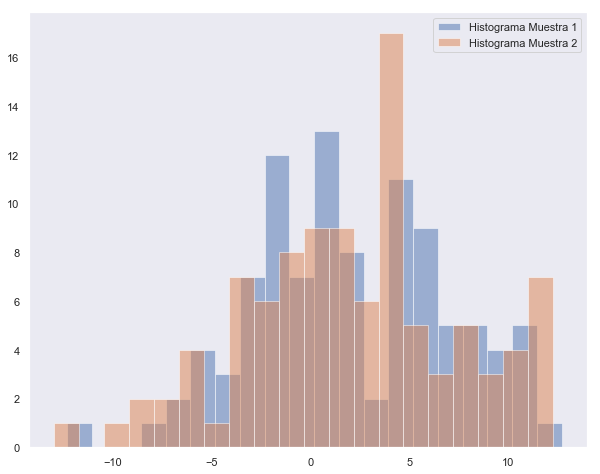

In [55]:
plt.figure(figsize = (10,8))
plt.hist(muestras_1, bins = 20, alpha = 0.5, label = 'Histograma Muestra 1')
plt.hist(muestras_2, bins = 20, alpha = 0.5, label = 'Histograma Muestra 2')
plt.legend()
plt.grid()
plt.show()